# Problem definition

1. #3 (age): age in years
2. #4 (sex): sex (1 = male; 0 = female)
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol): serum cholestoral in mg/dl
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. #32 (thalach): maximum heart rate achieved
9. #38 (exang): exercise induced angina (1 = yes; 0 = no)
10. #40 (oldpeak): ST depression induced by exercise relative to rest
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping
12. #44 (ca): number of major vessels (0-3) colored by flourosopy
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing Data vocabulary:

# Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression
# from xgboost import XGBRegressor
# from xgboost import plot_importance


#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.7f' % x)

# Data Gathering

In [19]:
df0 = pd.read_csv("heart.csv")

In [6]:
df = pd.read_csv("heart.csv")

# Data Preparation

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3000000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5000000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4000000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8000000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6000000,2,0,2,1


In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
df.shape

(303, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0000000,54.3663366,9.0821010,29.0000000,47.5000000,55.0000000,61.0000000,77.0000000
sex,303.0000000,0.6831683,0.4660108,0.0000000,0.0000000,1.0000000,1.0000000,1.0000000
cp,303.0000000,0.9669967,1.0320525,0.0000000,0.0000000,1.0000000,2.0000000,3.0000000
trestbps,303.0000000,131.6237624,17.5381428,94.0000000,120.0000000,130.0000000,140.0000000,200.0000000
chol,303.0000000,246.2640264,51.8307510,126.0000000,211.0000000,240.0000000,274.5000000,564.0000000
fbs,303.0000000,0.1485149,0.3561979,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000
restecg,303.0000000,0.5280528,0.5258596,0.0000000,0.0000000,1.0000000,1.0000000,2.0000000
thalach,303.0000000,149.6468647,22.9051611,71.0000000,133.5000000,153.0000000,166.0000000,202.0000000
exang,303.0000000,0.3267327,0.4697945,0.0000000,0.0000000,0.0000000,1.0000000,1.0000000
oldpeak,303.0000000,1.0396040,1.1610750,0.0000000,0.0000000,0.8000000,1.6000000,6.2000000


In [14]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [16]:
numerical= df.drop(['target'], axis=1).select_dtypes('number').columns

print(f'Numerical Columns:  {df[numerical].columns}')

Numerical Columns:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


**Check for Duplicated Values**

In [17]:
df.duplicated().value_counts()

False    302
True       1
dtype: int64

In [20]:
df[df.duplicated()] ==0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,False,False,False,False,False,True,False,False,True,True,False,False,False,False


In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(302, 14)

**Check for Missing Values**

In [27]:
miss_val = []
[miss_val.append(i) for i in df0.columns if any(df0[i].isnull())]
miss_val

[]

In [28]:
df0.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

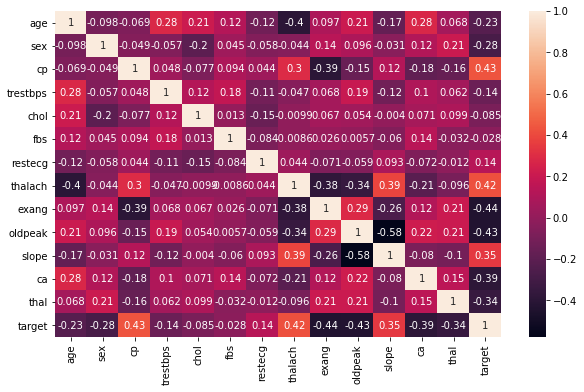

In [29]:
sns.heatmap(df0.corr(), annot=True);

## The Examination of Target Variable

In [30]:
df['target'].describe()

count   302.0000000
mean      0.5430464
std       0.4989704
min       0.0000000
25%       0.0000000
50%       1.0000000
75%       1.0000000
max       1.0000000
Name: target, dtype: float64

In [31]:
print( f"Skewness: {df['target'].skew()}")

Skewness: -0.17369101189529737


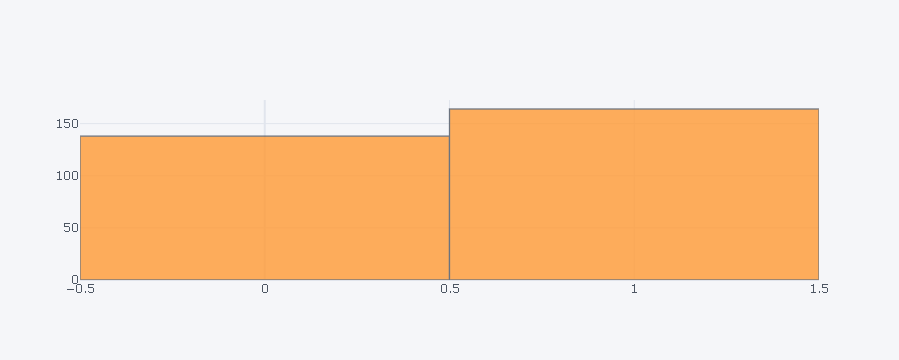

In [32]:
df['target'].iplot(kind='hist')

## Numerical Features

In [33]:
df[numerical].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000
mean,54.4205298,0.6821192,0.9635762,131.6026490,246.5000000,0.1490066,0.5264901,149.5695364,0.3278146,1.0430464,1.3973510,0.7185430,2.3145695
std,9.0479697,0.4664257,1.0320436,17.5633942,51.7534887,0.3566860,0.5260272,22.9035273,0.4701960,1.1614523,0.6162740,1.0067483,0.6130255
min,29.0000000,0.0000000,0.0000000,94.0000000,126.0000000,0.0000000,0.0000000,71.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
25%,48.0000000,0.0000000,0.0000000,120.0000000,211.0000000,0.0000000,0.0000000,133.2500000,0.0000000,0.0000000,1.0000000,0.0000000,2.0000000
50%,55.5000000,1.0000000,1.0000000,130.0000000,240.5000000,0.0000000,1.0000000,152.5000000,0.0000000,0.8000000,1.0000000,0.0000000,2.0000000
75%,61.0000000,1.0000000,2.0000000,140.0000000,274.7500000,0.0000000,1.0000000,166.0000000,1.0000000,1.6000000,2.0000000,1.0000000,3.0000000
max,77.0000000,1.0000000,3.0000000,200.0000000,564.0000000,1.0000000,2.0000000,202.0000000,1.0000000,6.2000000,2.0000000,4.0000000,3.0000000


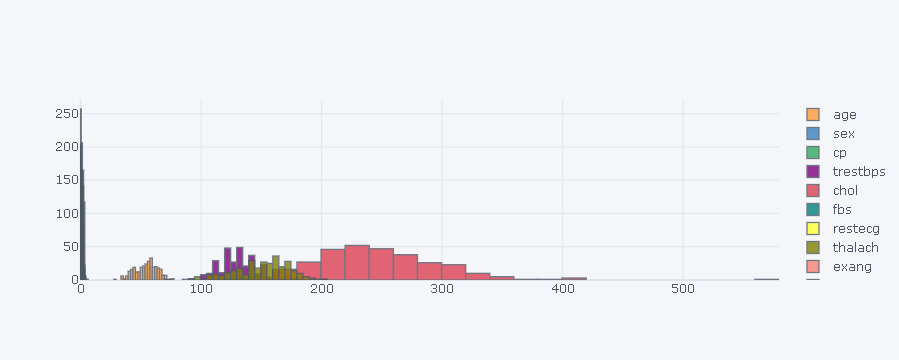

In [34]:
df[numerical].iplot(kind='hist');

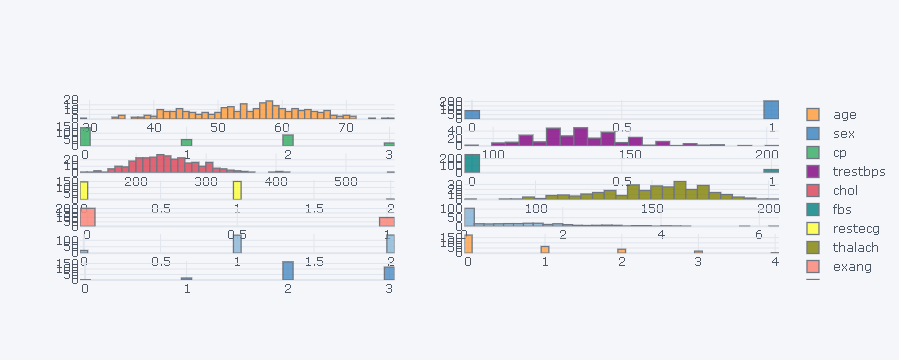

In [35]:
df[numerical].iplot(kind='histogram',subplots=True,bins=50)

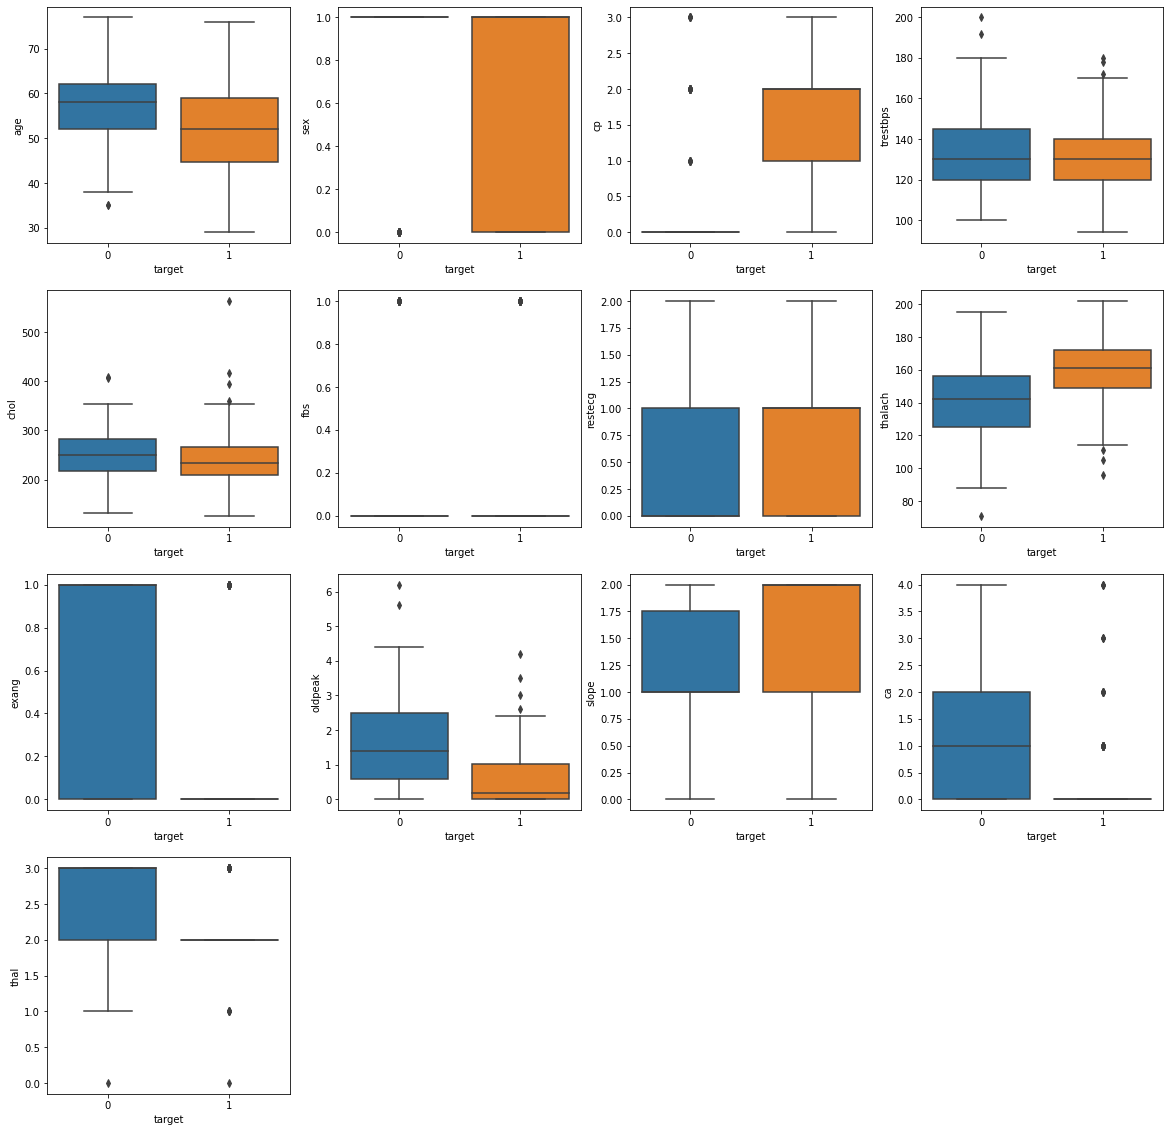

In [36]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "target":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='target',y=feature,data=df)

In [37]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

fbs        1.9812009
ca         1.2957385
oldpeak    1.2661727
chol       1.1473324
sex       -0.7861201
dtype: float64

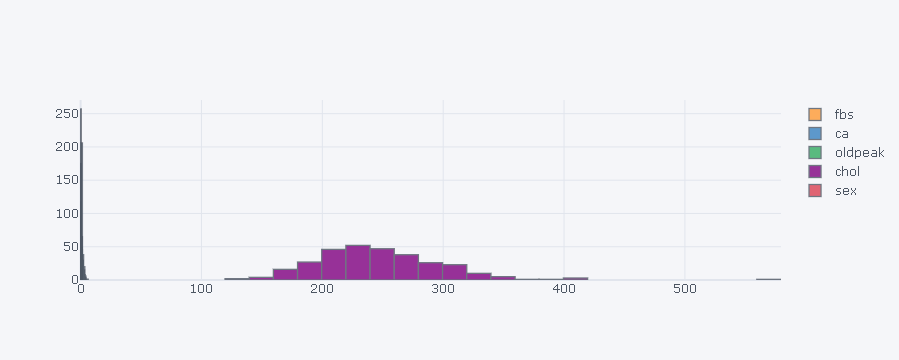

In [38]:
df[skew_cols.index].iplot(kind='hist');

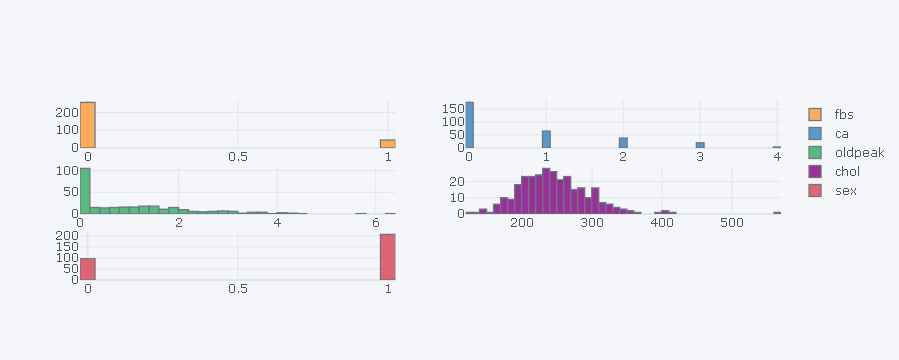

In [39]:
df[skew_cols.index].iplot(kind='histogram',subplots=True,bins=50)

In [40]:
# numerical1= df0.select_dtypes('number').columns

# matrix = np.triu(df0[numerical1].corr())
# fig, ax = plt.subplots(figsize=(14,10)) 
# sns.heatmap (df0[numerical1].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

# Model Selection

## Data Preprocessing

In [ ]:
# X = df.drop("target", axis=1)
# y = df.pop("target")

In [42]:
X = df.drop(["target"], axis=1)
y = df["target"]

##### Train & Split

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Scaling

In [81]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [82]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Implement Logistic Regression and Evaluate

- with default parameters

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
log_model=LogisticRegression(class_weight = "balanced")

In [85]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [86]:
y_pred=log_model.predict(X_test_scaled)

In [87]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [88]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
42,45,1,0,104,208,0,0,148,1,3.0000000,1,0,2,1,0,0.1609744
146,44,0,2,118,242,0,1,149,0,0.3000000,1,1,2,1,1,0.8817194
194,60,1,2,140,185,0,0,155,0,3.0000000,1,0,2,0,0,0.4908303
250,51,1,0,140,298,0,1,122,1,4.2000000,1,3,3,0,0,0.0105463
272,67,1,0,120,237,0,1,71,0,1.0000000,1,0,2,0,0,0.2457169
176,60,1,0,117,230,1,1,160,1,1.4000000,2,2,3,0,0,0.1396569
76,51,1,2,125,245,1,0,166,0,2.4000000,1,0,2,1,1,0.6678302
292,58,0,0,170,225,1,0,146,1,2.8000000,1,2,1,0,0,0.2176802
57,45,1,0,115,260,0,0,185,0,0.0000000,2,0,2,1,1,0.7349983
152,64,1,3,170,227,0,0,155,0,0.6000000,1,0,3,1,1,0.5024072


## Model Performance on Classification Tasks

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [90]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[26  3]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



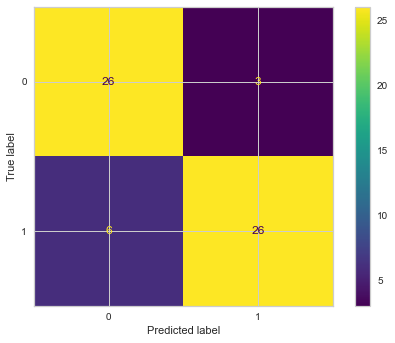

In [98]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

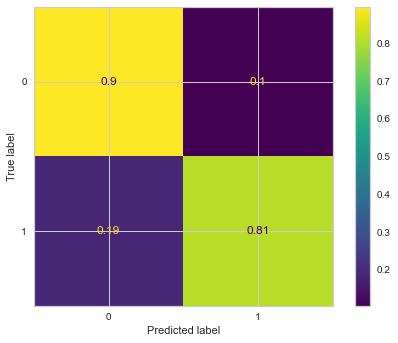

In [99]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

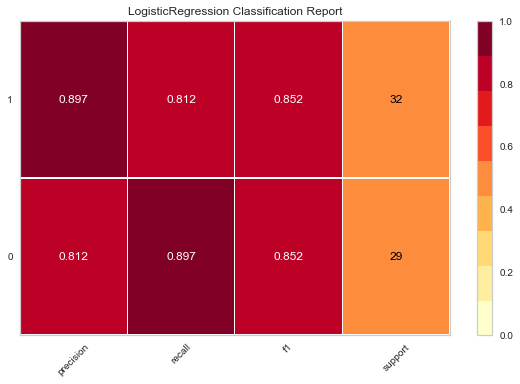

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [96]:
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(log_model)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_scaled, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(log_model, support=True)
visualizer.fit(X_train_scaled, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show()


## Cross Validate

**NOTE: It can be implemented by either default parameter or GridSearch**

**a) Implemendation of Cross-Validation With Default Parameter (0.5 threshold)**

In [100]:
from sklearn.model_selection import cross_validate

In [101]:
model = LogisticRegression(class_weight = "balanced")
model

LogisticRegression(class_weight='balanced')

In [102]:
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
#df_scores
df_scores.mean()[2:]

test_accuracy    0.8340000
test_precision   0.8630815
test_recall      0.8406593
test_f1          0.8453464
dtype: float64



**b) Implemendation of Cross-Validation With Best Parameters (GridsearchCV)**

**LogisticRegression automatically makes regularizition and Default parameter is Ridge. We can change this parameter in accordance with our concept and/or dataset.**

Special Note:

Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes.

Warning:

The choice of the algorithm depends on the penalty chosen: Supported penalties by solver: ‘newton-cg’ - [‘l2’, ‘none’]

‘lbfgs’ - [‘l2’, ‘none’]

‘liblinear’ - [‘l1’, ‘l2’]

‘sag’ - [‘l2’, ‘none’]

‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

We prefer "saga" since we selected "l1", "l2" and "elasticnet" as penalty.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [106]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)
param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C": C}

In [108]:
log_model = LogisticRegression(solver="saga", max_iter=5000)

In [109]:
grid_model = GridSearchCV(log_model, param_grid= param_grid)

In [110]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [111]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [112]:
y_test_pred = grid_model.predict(X_test_scaled)
y_test_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

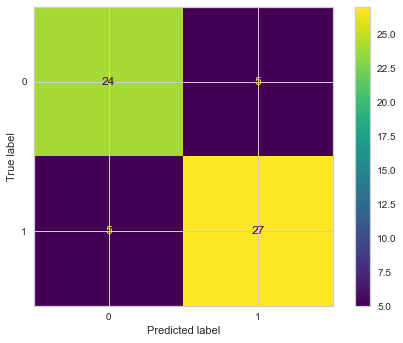

In [113]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)


## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [114]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

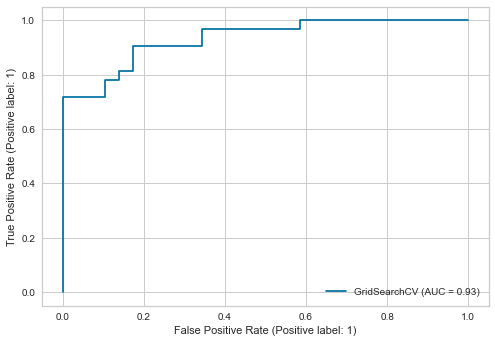

In [116]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

In [119]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9176396997497915

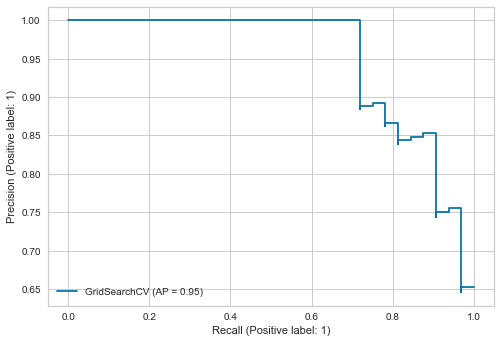

In [125]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

In [126]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9273915468566818

## Finding Best Threshold

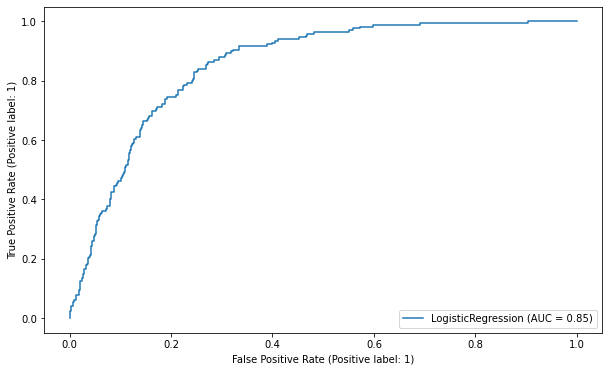

In [75]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [76]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.8526123080801062

In [121]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [122]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5311704728454313

In [123]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
180,55,1,0,132,353,0,1,132,1,1.2000000,1,1,3,0,0,0.0600031
229,64,1,2,125,309,0,1,131,1,1.8000000,1,0,3,0,0,0.1971670
111,57,1,2,150,126,1,1,173,0,0.2000000,2,1,3,1,1,0.7225729
247,66,1,1,160,246,0,1,120,1,0.0000000,1,3,1,0,0,0.0922788
60,71,0,2,110,265,1,0,130,0,0.0000000,2,1,2,1,1,0.9038777


In [81]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)

In [82]:
test_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,pred,pred_proba,pred2
4688,31.0000000,0,0,64.8500000,23.0000000,1,0,0,0,1,0,0,0,0,0,0,0,0.0717043,0
4478,40.0000000,0,0,65.2900000,28.3000000,1,1,0,0,1,0,0,0,1,0,0,0,0.0897056,0
3521,52.0000000,0,0,111.0400000,30.0000000,1,1,0,1,0,0,0,0,1,0,0,0,0.2881690,0
4355,79.0000000,1,0,76.6400000,19.5000000,0,1,0,0,1,0,0,0,1,0,0,1,0.8434813,1
3826,75.0000000,0,0,94.7700000,27.2000000,0,1,0,0,0,0,0,0,1,0,0,1,0.6973118,1


In [83]:
y_pred2 = test_data["pred2"]

In [84]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[871 327]
 [ 21  59]]
              precision    recall  f1-score   support

           0       0.98      0.73      0.83      1198
           1       0.15      0.74      0.25        80

    accuracy                           0.73      1278
   macro avg       0.56      0.73      0.54      1278
weighted avg       0.92      0.73      0.80      1278



In [85]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[892 306]
 [ 22  58]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1198
           1       0.16      0.72      0.26        80

    accuracy                           0.74      1278
   macro avg       0.57      0.73      0.55      1278
weighted avg       0.92      0.74      0.81      1278



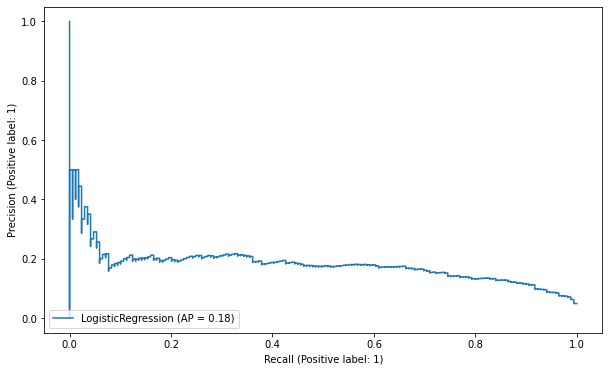

In [86]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);

In [87]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.18027326520780398

In [88]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [89]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.9622376399833874

# Final Model

In [90]:
scaler = MinMaxScaler().fit(X)

In [91]:
X_scaled = scaler.transform(X)
X_scaled

array([[0.81689453, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.74365234, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.97558594, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.42626953, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.62158203, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.53613281, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [92]:
final_model = LogisticRegression(class_weight = "balanced").fit(X_scaled, y)
final_model

LogisticRegression(class_weight='balanced')

In [93]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5109.0000000,43.2299863,22.6135753,0.0800000,25.0000000,45.0000000,61.0000000,82.0000000
hypertension,5109.0000000,0.0974750,0.2966326,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000
heart_disease,5109.0000000,0.0540223,0.2260839,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000
avg_glucose_level,5109.0000000,106.1403993,45.2850037,55.1200000,77.2400000,91.8800000,114.0900000,271.7400000
bmi,5109.0000000,28.7569387,7.7652871,10.3000000,23.6000000,27.9000000,32.8000000,97.6000000
gender_Male,5109.0000000,0.4139753,0.4925924,0.0000000,0.0000000,0.0000000,1.0000000,1.0000000
ever_married_Yes,5109.0000000,0.6562928,0.4749913,0.0000000,0.0000000,1.0000000,1.0000000,1.0000000
work_type_Never_worked,5109.0000000,0.0043061,0.0654861,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000
work_type_Private,5109.0000000,0.5723234,0.4947901,0.0000000,0.0000000,1.0000000,1.0000000,1.0000000
work_type_Self-employed,5109.0000000,0.1603053,0.3669249,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000


# Model Deployment

In [103]:
import pickle
pickle.dump(scaler, open("scaler_stroke", 'wb'))

In [104]:
pickle.dump(final_model, open("final_model_stroke", 'wb'))

In [105]:
my_dict = {"age": [18, 43, 67],
           "hypertension":[0,0,1],
           "heart_disease":[0,1,1],
           "avg_glucose_level": [56.28, 89.17, 127.23],
           "bmi": [18, 25, 29],
           "gender_Male": [1, 1, 0],
           "ever_married_Yes": [0, 1, 1],
           "work_type_Never_worked": [1, 0, 0],
           "work_type_Private": [0, 1, 0],
           "work_type_Self-employed": [0, 0, 1],
           "work_type_children": [1, 0, 0],
           "residence_type_Urban": [1, 0, 0],
           "smoking_status_formerly smoked": [0, 0, 1],
           "smoking_status_never smoked": [1, 0, 0],
           "smoking_status_smoke": [0, 1, 0]
          }

In [106]:
sample = pd.DataFrame(my_dict)
sample

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smoke
0,18,0,0,56.2800000,18,1,0,1,0,0,1,1,0,1,0
1,43,0,1,89.1700000,25,1,1,0,1,0,0,0,0,0,1
2,67,1,1,127.2300000,29,0,1,0,0,1,0,0,1,0,0


In [107]:
scaler_stroke = pickle.load(open("scaler_stroke", "rb"))

In [108]:
sample_scaled = scaler_stroke.transform(sample)
sample_scaled

array([[0.21875   , 0.        , 0.        , 0.005355  , 0.0882016 ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ],
       [0.52392578, 0.        , 1.        , 0.1571877 , 0.16838488,
        1.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.81689453, 1.        , 1.        , 0.33288708, 0.21420389,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ]])

In [109]:
final_model = pickle.load(open("final_model_stroke", "rb"))

In [110]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [111]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred"] = predictions
sample["pred2"] = predictions2
sample

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smoke,pred_proba,pred,pred2
0,18,0,0,56.2800000,18,1,0,1,0,0,1,1,0,1,0,0.0582660,0,0
1,43,0,1,89.1700000,25,1,1,0,1,0,0,0,0,0,1,0.3052126,0,0
2,67,1,1,127.2300000,29,0,1,0,0,1,0,0,1,0,0,0.8119278,1,0


# Implement KNN and Evaluate